In [1]:
import pandas as pd
import json

from matplotlib_venn import venn3
import matplotlib.pyplot as plt

from GoogleSearchAPI import GoogleSearchAPI
from JsonMerger import JsonMerger
from QuantitativeAnalysis import QuantitativeAnalysis
from NewsExtractor import NewsExtractor
from QualitativeAnalysis import QualitativeAnalysis

In [ ]:
# CONFIGURAÇÕES DA PESQUISA
from datetime import date
query = "'amazônia', 'floresta amazônica'"
time_period = (date(2022, 10, 1), date(2022, 12, 31)) # (início, fim) - troque as datas de acordo com sua necessidade
region = "br"
max_results = 100
max_results_per_page = 10
api_key = "sua_api_do_google"
cx = "seu_codigo_cx"

In [ ]:
############# GOOGLE #############

# Instancie a classe GoogleSearchAPI
google_search_api = GoogleSearchAPI(api_key, cx)

# Chamar o método search e obter os resultados
results = google_search_api.search(query, region, time_period, max_results)

# Obter a data final da pesquisa e formatá-la como string no formato "YYYYMMDD"
data_final_str = time_period[1].strftime("%Y%m%d")

# Salvar os resultados em um arquivo JSON com o prefixo da data final
with open(f"{data_final_str}_api_results.json", "w", encoding="utf-8") as f:
    json.dump(results, f, ensure_ascii=False, indent=4)

In [10]:
# UNIÃO DOS JSONs
# Merger Json
input_directory = "JsonFiles"
output_file = "Statistic/BaseNoticias.json"

merger = JsonMerger(input_directory)
merger.merge_json_files(output_file)

In [12]:
# ANÁLISE QUANTITATIVA
# Inicialize a classe com os dados das notícias
analysis = QuantitativeAnalysis("Statistic/BaseNoticias.json")

# Salva os resultados em um arquivo Json.
#analysis.save_to_file("Statistic/StatisticBaseNoticias.json")

# Conta quantas notícias foram encontradas no arquivo JSON
n_total = analysis.contar_total_noticias()
print(f'Total de notícias: {n_total}')

# Plota os gráficos e salva
analysis.plot_graph("Statistic/GraphStatisticBaseNoticias.png")

AttributeError: 'QuantitativeAnalysis' object has no attribute 'noticias'

In [10]:
# Exemplo de uso:
input_file = 'Statistic/BaseNoticias.json'  # O arquivo JSON com os 1400 links de notícias sobre a Amazônia
output_file = 'NewsReaded/ReadedNews2.json'

extractor = NewsExtractor()
extractor.extract_and_save_news_content(input_file, output_file)

Extraindo notícia: https://www.worldbank.org/pt/news/feature/2019/05/22/why-the-amazons-biodiversity-is-critical-for-the-globe
Extraindo notícia: https://g1.globo.com/meio-ambiente/amazonia/
Extraindo notícia: https://www.reuters.com/article/ambiente-amazonia-espiralmorte-idLTAKBN29W2PQ
Extraindo notícia: https://www.undp.org/pt/brazil/news/florestacomunidades-recebe-255-ideias-de-projeto-da-amazonia-legal
Extraindo notícia: https://www.fundoamazonia.gov.br/pt/home/
Extraindo notícia: https://www.bbc.com/portuguese/geral-64395133
Extraindo notícia: https://fas-amazonia.org/
Extraindo notícia: https://www12.senado.leg.br/noticias/materias/2021/01/19/preservacao-da-amazonia-esteve-em-debate-no-senado-em-2020
Extraindo notícia: https://www.camara.leg.br/noticias/850267-proposta-regulamenta-fundo-amazonia-em-lei/
Extraindo notícia: https://www.estadao.com.br/tudo-sobre/floresta-amazonica/
Extraindo notícia: https://www.embrapa.br/busca-de-noticias/-/noticia/78026270/estudo-aponta-que-a-deg

KeyboardInterrupt: 

In [8]:
qa = QualitativeAnalysis('NewsReaded/ReadedNews.json')

# Contagem de notícias no conjunto 1
palavras1 = ['Amazônia']
n1 = qa.contar_noticias(palavras1, 'AND')
print(f'Número de notícias no conjunto 1: {n1}')

# Contagem de notícias no conjunto 2
palavras2 = ['Bolsonaro']
n2 = qa.contar_noticias(palavras2, 'AND')
print(f'Número de notícias no conjunto 2: {n2}')

# Contagem de notícias nos conjuntos 1 e 2
palavras3 = ['COVID' ]
n3 = qa.contar_noticias(palavras3, 'AND')
print(f'Número de notícias no conjunto 3: {n3}')

# Contagem de notícias em somente 1.
palavras4 = ['queimada', 'queimadas', 'garimpo', 'desmatamento', 'mineração', 'madereira', 'mortes', 'morte', 'violência']
n4 = qa.contar_noticias(palavras4, 'OR')
print(f'Número de notícias no conjunto 4: {n4}')

Número de notícias no conjunto 1: 1365
Número de notícias no conjunto 2: 285
Número de notícias no conjunto 3: 306
Número de notícias no conjunto 4: 1037


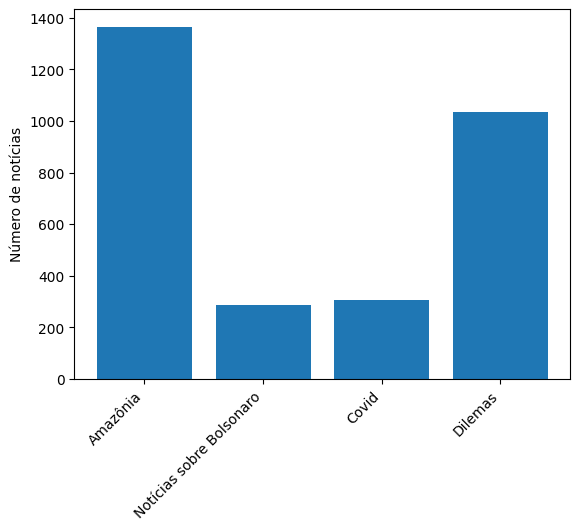

In [9]:
import matplotlib.pyplot as plt

def plot_results(results, labels):
    x = range(len(results))
    plt.bar(x, results)
    plt.xticks(x, labels, rotation=45, ha="right")
    plt.ylabel("Número de notícias")
    plt.show()

resultados = [n1, n2, n3, n4]
rótulos = [
    "Amazônia",
    "Notícias sobre Bolsonaro",
    "Covid",
    "Dilemas",
]

plot_results(resultados, rótulos)


In [37]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

def plot_venn(results, labels):
    plt.figure()
    venn2(subsets=results, set_labels=labels)
    plt.show()

In [43]:
conjunto1_somente = n1
conjunto2_somente = n2
intersecao = n1-n2

resultados_venn = (conjunto1_somente, conjunto2_somente, intersecao)
rótulos_venn = ("Amazônia", "Bolsonaro", "Amazônia U Bolsonaro")

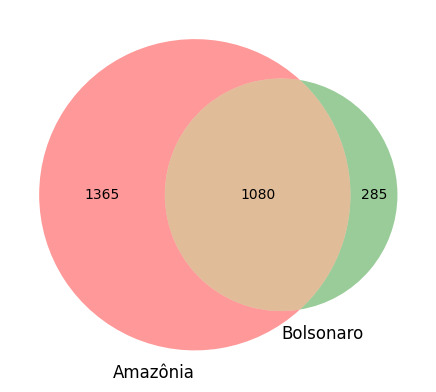

In [44]:
plot_venn(resultados_venn, rótulos_venn)

In [46]:
# Certifique-se de importar a biblioteca JSON e definir a classe QualitativeAnalysis antes deste passo

arquivo_json = 'NewsReaded/ReadedNews.json'
qa = QualitativeAnalysis(arquivo_json)

palavras = ['Amazônia', 'Governo', 'Desmatamento']
contadores = qa.contar_noticias_por_palavra(palavras)



n_amazonia_governo = qa.contar_noticias(['Amazônia', 'Governo'], 'AND')
n_amazonia_desmatamento = qa.contar_noticias(['Amazônia', 'Desmatamento'], 'AND')
n_governo_desmatamento = qa.contar_noticias(['Governo', 'Desmatamento'], 'AND')
n_amazonia_governo_desmatamento = qa.contar_noticias(['Amazônia', 'Governo', 'Desmatamento'], 'AND')

conjunto_amazonia = contadores[0] - n_amazonia_governo - n_amazonia_desmatamento + n_amazonia_governo_desmatamento
conjunto_governo = contadores[1] - n_amazonia_governo - n_governo_desmatamento + n_amazonia_governo_desmatamento
conjunto_desmatamento = contadores[2] - n_amazonia_desmatamento - n_governo_desmatamento + n_amazonia_governo_desmatamento
intersecao_amazonia_governo = n_amazonia_governo - n_amazonia_governo_desmatamento
intersecao_amazonia_desmatamento = n_amazonia_desmatamento - n_amazonia_governo_desmatamento
intersecao_governo_desmatamento = n_governo_desmatamento - n_amazonia_governo_desmatamento

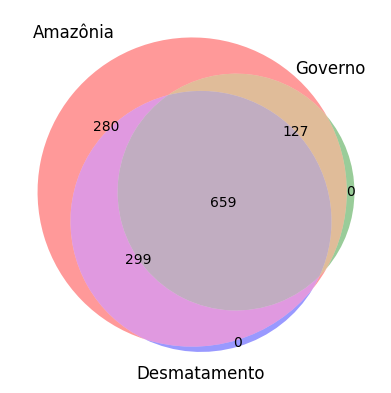

In [47]:
from matplotlib_venn import venn3

def plot_venn3(results, labels):
    plt.figure()
    venn3(subsets=results, set_labels=labels)
    plt.show()

resultados_venn = (
    conjunto_amazonia,
    conjunto_governo,
    intersecao_amazonia_governo,
    conjunto_desmatamento,
    intersecao_amazonia_desmatamento,
    intersecao_governo_desmatamento,
    n_amazonia_governo_desmatamento,
)

rótulos_venn = ("Amazônia", "Governo", "Desmatamento")

plot_venn3(resultados_venn, rótulos_venn)
